Accuracy: 0.988 
Precision: 0.743 
Recall: 0.750


D:\Dev\Python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['./models/rf.sav']

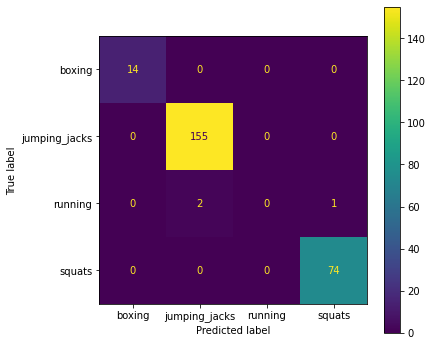

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

dataframe = pd.read_csv('./backend_data/PPWID_100_10.csv')

# Data Format - class - 0, (gyroscope 1-3, acceleromter 4-6, magnetometr 7-9) x 10 [1-90]

X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = dataframe.drop('0', axis=1)
y = dataframe['0']

# Best Random Forest combination - Acceleromter (+6g) + Magnetometr

gyroscope_cols = []

for i in range(1, X.shape[1], 12):
    gyroscope_cols.append(str(i))
    gyroscope_cols.append(str(i+1))
    gyroscope_cols.append(str(i+2))

X = X.drop(gyroscope_cols, axis=1)

# print(X.head(5))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.20)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
clf = RandomForestClassifier(max_depth = 50, random_state = 123)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred,average=None).mean()
r = recall_score(y_test, y_pred, average=None).mean()

print("Accuracy: %.3f \nPrecision: %.3f \nRecall: %.3f" % (acc, p, r) )

cm = confusion_matrix(y_test, y_pred, normalize = None)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, 
    display_labels=['boxing', 'jumping_jacks', 'running', 'squats']
)

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)
    
filename = './models/rf.sav'
joblib.dump(clf, filename)